<a href="https://colab.research.google.com/github/corabius/FiveInARow/blob/master/GAN_StyleTransfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git
!pip install keras==2.2.4
!pip install git+https://github.com/apple/coremltools.git@master

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-oswmfiea
  Stored in directory: /tmp/pip-ephem-wheel-cache-s7ti46sv/wheels/11/27/c8/4ed56de7b55f4f61244e2dc6ef3cdbaff2692527a2ce6502ba
Successfully built keras-contrib
  Cloning https://github.com/apple/coremltools.git (to revision master) to /tmp/pip-req-build-prxndxf6
  Stored in directory: /tmp/pip-ephem-wheel-cache-eyvjyr0a/wheels/cf/4b/ab/6283da44c6aee811fe45f7c0ac5c5afbe9ec7b43d1003da3de
Successfully built coremltools


In [0]:
import sys
import PIL.Image
import os
from IPython.utils import io

In [4]:
# Install git lfs first so we can get download model checkpoints
!curl -s https://packagecloud.io/install/repositories/github/git-lfs/script.deb.sh | sudo bash
!apt-get install git-lfs
!git lfs install

Detected operating system as Ubuntu/bionic.
Checking for curl...
Detected curl...
Checking for gpg...
Detected gpg...
Running apt-get update... done.
Installing apt-transport-https... done.
Installing /etc/apt/sources.list.d/github_git-lfs.list...done.
Importing packagecloud gpg key... done.
Running apt-get update... done.

The repository is setup! You can now install packages.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  git-lfs
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 5,048 kB of archives.
After this operation, 12.6 MB of additional disk space will be used.
Get:1 https://packagecloud.io/github/git-lfs/ubuntu bionic/main amd64 git-lfs amd64 2.7.1 [5,048 kB]
Fetched 5,048 kB in 0s (11.3 MB/s)
Selecting previously unselected package git-lfs.
(Reading database ... 131326 files and directories currently installed.)
Preparing to unpack .../git-lfs_2.7.1_amd6

In [5]:
!git clone https://github.com/fritzlabs/fritz-models.git

Cloning into 'fritz-models'...
remote: Enumerating objects: 756, done.
remote: Total 756 (delta 0), reused 0 (delta 0), pack-reused 756
Receiving objects: 100% (756/756), 3.85 MiB | 7.89 MiB/s, done.
Resolving deltas: 100% (429/429), done.
Filtering content: 100% (13/13), 220.25 MiB | 51.48 MiB/s, done.


In [0]:
# Add the Fritz Style Transfer package to your python path
sys.path.append('/content/fritz-models/style_transfer/')

In [0]:
!mkdir fritz-models/style_transfer/data/

In [17]:
!cd fritz-models/style_transfer && pwd

/content/fritz-models/style_transfer


In [18]:
!cd data
!wget http://www.marbellapropertystyling.com/wp-content/uploads/2016/03/property-styling-marbella.jpg

/bin/bash: line 0: cd: data: No such file or directory
--2019-03-01 09:47:49--  http://www.marbellapropertystyling.com/wp-content/uploads/2016/03/property-styling-marbella.jpg
Resolving www.marbellapropertystyling.com (www.marbellapropertystyling.com)... 139.162.216.5
Connecting to www.marbellapropertystyling.com (www.marbellapropertystyling.com)|139.162.216.5|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 482304 (471K) [image/jpeg]
Saving to: ‘property-styling-marbella.jpg’

property-styling-ma 100%[===================>] 471.00K   664KB/s    in 0.7s    

2019-03-01 09:47:50 (664 KB/s) - ‘property-styling-marbella.jpg’ saved [482304/482304]



In [21]:
!mv property-styling-marbella.jpg fritz-models/style_transfer/data/style_image.jpg

mv: cannot stat 'property-styling-marbella.jpg': No such file or directory


In [63]:
!ls -l fritz-models/style_transfer/data/

total 3328952
drwxrwxr-x 69 7135 7135       4096 Mar 17  2009 Images
-rw-r--r--  1 root root 2592010240 Jun 27  2009 indoorCVPR_09.tar
-rw-r--r--  1 root root     482304 Apr 30  2017 style_image.jpg
-rw-r--r--  1 root root          0 Mar  1 11:12 training_images_spaces.tfrecord
-rw-r--r--  1 root root          0 Mar  1 10:51 training_images.tfrecord
drwxrwxr-x  2 root root     172032 Mar  1 10:38 val2017
-rw-r--r--  1 root root  815585330 Jul 11  2018 val2017.zip
-rw-r--r--  1 root root     569552 Mar  1 10:21 white_025.h5


In [34]:
# training_data_url = "http://images.cocodataset.org/zips/val2017.zip"
training_data_url = "http://groups.csail.mit.edu/vision/LabelMe/NewImages/indoorCVPR_09.tar"

!cd fritz-models/style_transfer/data/ && wget $training_data_url

print("Unzipping")


--2019-03-01 10:41:39--  http://groups.csail.mit.edu/vision/LabelMe/NewImages/indoorCVPR_09.tar
Resolving groups.csail.mit.edu (groups.csail.mit.edu)... 128.30.2.130
Connecting to groups.csail.mit.edu (groups.csail.mit.edu)|128.30.2.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2592010240 (2.4G) [application/x-tar]
Saving to: ‘indoorCVPR_09.tar.2’

indoorCVPR_09.tar.2   7%[>                   ] 197.45M  20.9MB/s    eta 2m 0s  ^C
Unzipping
Finished Downloading data


In [43]:

    #!unzip -o -d fritz-models/style_transfer/data/ fritz-models/style_transfer/data/val2017.zip
    #!tar -xv -o -d fritz-models/style_transfer/data/ -s fritz-models/style_transfer/data/indoorCVPR_09.tar
!tar -xvf fritz-models/style_transfer/data/indoorCVPR_09.tar -C fritz-models/style_transfer/data/

print(f"Finished Downloading data")

Images/
Images/airport_inside/
Images/airport_inside/airport_inside_0001.jpg
Images/airport_inside/airport_inside_0002.jpg
Images/airport_inside/airport_inside_0003.jpg
Images/airport_inside/airport_inside_0004.jpg
Images/airport_inside/airport_inside_0005.jpg
Images/airport_inside/airport_inside_0006.jpg
Images/airport_inside/airport_inside_0048.jpg
Images/airport_inside/airport_inside_0007.jpg
Images/airport_inside/airport_inside_0008.jpg
Images/airport_inside/airport_inside_0009.jpg
Images/airport_inside/airport_inside_0010.jpg
Images/airport_inside/airport_inside_0011.jpg
Images/airport_inside/airport_inside_0012.jpg
Images/airport_inside/airport_inside_0013.jpg
Images/airport_inside/airport_inside_0047.jpg
Images/airport_inside/airport_inside_0014.jpg
Images/airport_inside/airport_inside_0015.jpg
Images/airport_inside/airport_inside_0049.jpg
Images/airport_inside/airport_inside_0016.jpg
Images/airport_inside/airport_inside_0017.jpg
Images/airport_inside/airport_inside_0018.jpg
Ima

In [0]:
!python create_training_dataset.py \
--output fritz-models/style_transfer/data/training_images_spaces.tfrecord \
--image-dir fritz-models/style_transfer/data/Images/


In [61]:
!cd fritz-models/style_transfer/ && export PYTHONPATH=`pwd` && python style_transfer/train.py \
--training-image-dset data/training_images_spaces.tfrecord \
--style-images data/style_image.jpg \
--model-checkpoint data/white_025.h5 \
--image-size 256,256 \
--alpha 0.25 \
--num-iterations 500 \
--batch-size 24 \
--style-weight 0.00001 \
--fine-tune-checkpoint example/starry_night_256x256_025.h5

Using TensorFlow backend.
INFO:trainer:Creating dataset from: data/training_images_spaces.tfrecord
INFO:trainer:Loading style images:
data/style_image.jpg
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Colocations handled automatically by placer.
INFO:models:Loading weights from checkpoint: example/starry_night_256x256_025.h5
2019-03-01 11:13:58.631717: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2200000000 Hz
2019-03-01 11:13:58.632016: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x5bd5fa0 executing computations on platform Host. Devices:
2019-03-01 11:13:58.632068: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>
2019-03-01 11:13:58.703818: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
201

In [57]:
#!rm fritz-models/style_transfer/data/indoorCVPR_09.tar.2

!pwd && ls

/content
fritz-models  sample_data


In [0]:
#@title Default title text
#@title Build Model
import style_transfer.models
import keras
from PIL import Image
from matplotlib import pyplot
import requests
from io import BytesIO
import numpy
from IPython.display import Markdown



def download_image(image_url):
    response = requests.get(image_url)
    return PIL.Image.open(BytesIO(response.content))


def run_prediction(model, image, image_size):
    image = image.resize(image_size)
    input_data = numpy.array(image)[None, :, :, :3] - 120.0
    output_data = model.predict(input_data)
    return PIL.Image.fromarray(output_data[0].astype('uint8'))


# Clear the keras session of the training we just did
keras.backend.clear_session()
# Load the model
image_size = (1080, 1080) #@param {type:"raw"}
model = style_transfer.models.StyleTransferNetwork.build(
    image_size,
    alpha=0.25, 
    checkpoint_file='/content/fritz-models/style_transfer/data/white_025.h5'
)

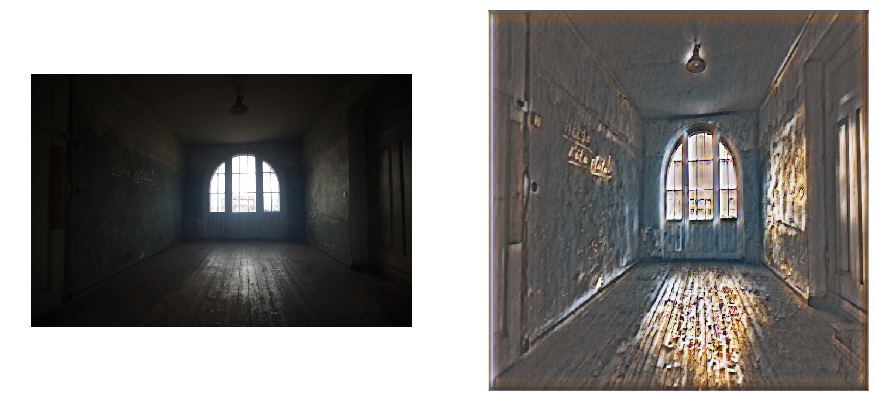

In [27]:
#@title Stylize an Image!
image_url = 'https://farm4.staticflickr.com/3319/3513886584_622c883114_b_d.jpg' #@param {type:"string"}
image = download_image(image_url)
stylized_image = run_prediction(model, image, image_size)

fig, ax = pyplot.subplots(1,2);
fig.set_size_inches(15, 7)
ax[0].axis('off')
ax[1].axis('off')

ax[0].imshow(image);
ax[1].imshow(stylized_image);

In [0]:
# Download the model
from google.colab import files
files.download('/content/fritz-models/style_transfer/data/white_025.h5')

In [0]:
!python fritz-models/style_transfer/convert_to_coreml.py \
--keras-checkpoint fritz-models/style_transfer/data/white_025.h5 \
--alpha 0.25 \
--image-size 640,640 \
--coreml-model fritz-models/style_transfer/data/white_025.mlmodel

In [0]:
# Download the mlmodel
from google.colab import files
files.download('/content/fritz-models/style_transfer/data/white_025.mlmodel')

In [0]:
!pip install fritz

In [0]:
#Fritz has to configure first
#!fritz configure 
!fritz model upload fritz-models/style_transfer/data/white_025.mlmodel